In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 1.0
P-value: 0.0


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.75655968564414e-06


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 1.0
P-value: 0.0


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.756783749101298e-06


In [9]:
weights_unenc_ckks

[0.0504959964223423,
 0.10959869975142579,
 -0.03223409937234011,
 0.00788709948334499,
 0.027328099342193803,
 0.0844229018170154,
 0.05206779692822887,
 0.09471360046084161,
 0.020562597965040716,
 -0.00020580303204344522,
 0.12345820053777902,
 0.07928130037595861,
 0.017474900356362136,
 0.002263599887570817,
 0.05721590021412267]

In [10]:
weights_unenc_sklearn

array([ 0.05134322,  0.11194777, -0.03033901,  0.01088261,  0.02938761,
        0.08467179,  0.0522445 ,  0.09551641,  0.0208037 ,  0.00182902,
        0.1244172 ,  0.08201499,  0.01940046,  0.00195993,  0.058301  ])

In [11]:
weights_unenc_paillier

[0.050496505944686375,
 0.10959768768320118,
 -0.03223435937356828,
 0.007889444619847563,
 0.027327676054204317,
 0.08442249868954589,
 0.05206935906505488,
 0.09471314992197892,
 0.02056200120576847,
 -0.00020604452675567563,
 0.12345671225417054,
 0.07928054860648627,
 0.017475036101413596,
 0.002264480287513999,
 0.05721490665333529]

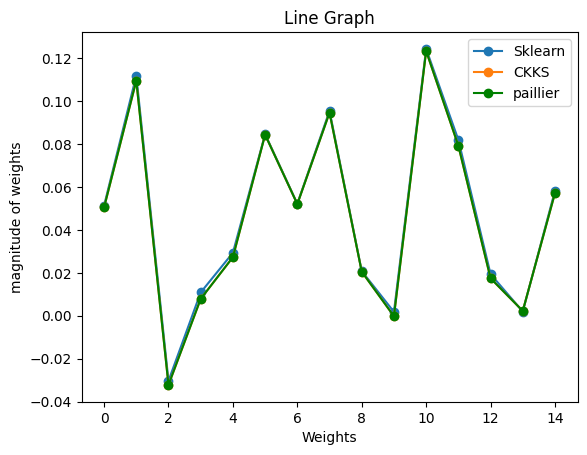

In [12]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

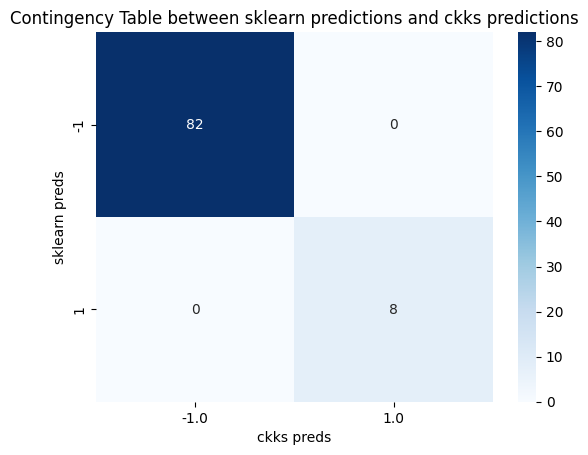

In [13]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

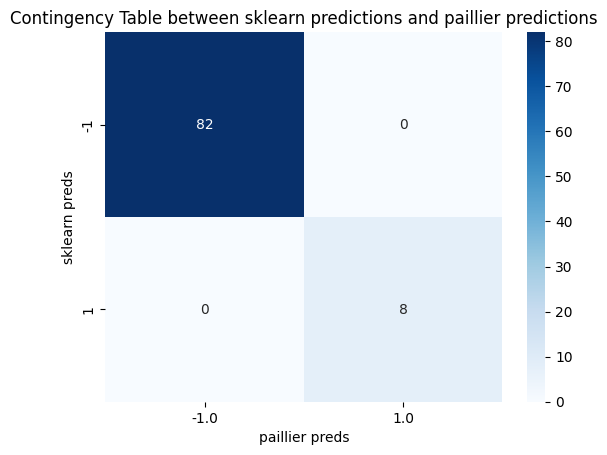

In [14]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

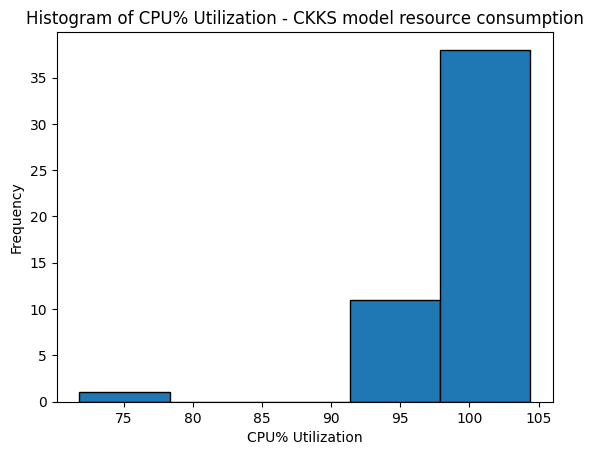

In [15]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.506
100.19999999999999


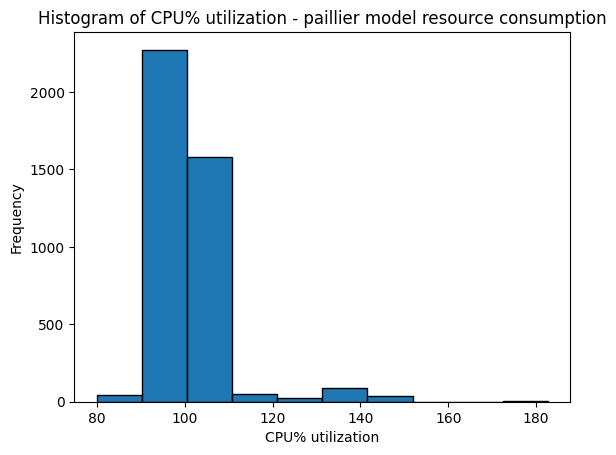

In [17]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [18]:
np.mean(filtered_paillier_cpu_util)

101.6416727627408

Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

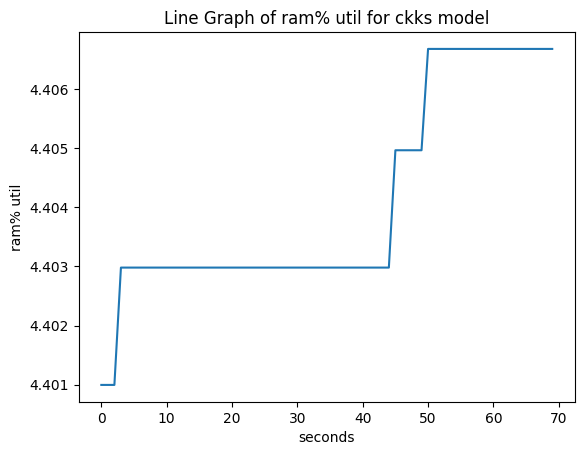

In [19]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [20]:
import numpy as np
np.mean(ram_usages_ckks)

4.404094866643469

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

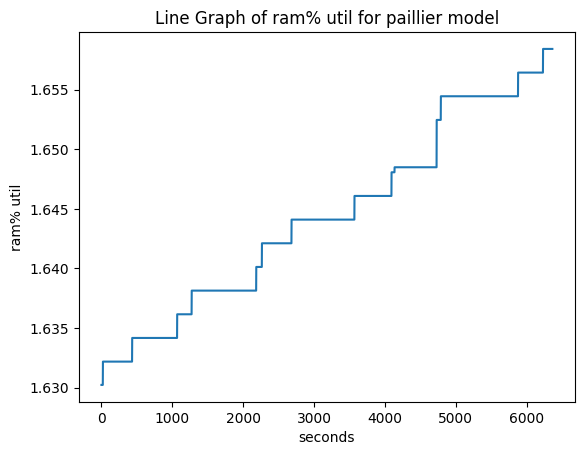

In [21]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [22]:
np.mean(ram_usages_paillier)

1.644432102601276

In [23]:
np.mean(ram_usages_sklearn)

1.5923000407811319

In [24]:
train_time_ckks

55.16732335090637

In [25]:
train_time_paillier

5267.101053476334

In [26]:
testing_time_ckks

2.375896453857422

In [27]:
testing_time_paillier

205.66349029541016

In [28]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.8, 0.8, 0.8)